<h1>Select, From & Where</h1>
The foundational compontents for all SQL queries

<h2>Introduction</h2>

Now that you know how to access and examine a dataset, you're ready to write your first SQL query! As you'll soon see, SQL queries will help you sort through a massive dataset, to retrieve only the information that you need.

We'll begin by using the keywords **SELECT**, **FROM**, and **WHERE** to get data from specific columns based on conditions you specify.

For clarity, we'll work with a small imaginary dataset `pet_records` which contains just one table, called `pets`.

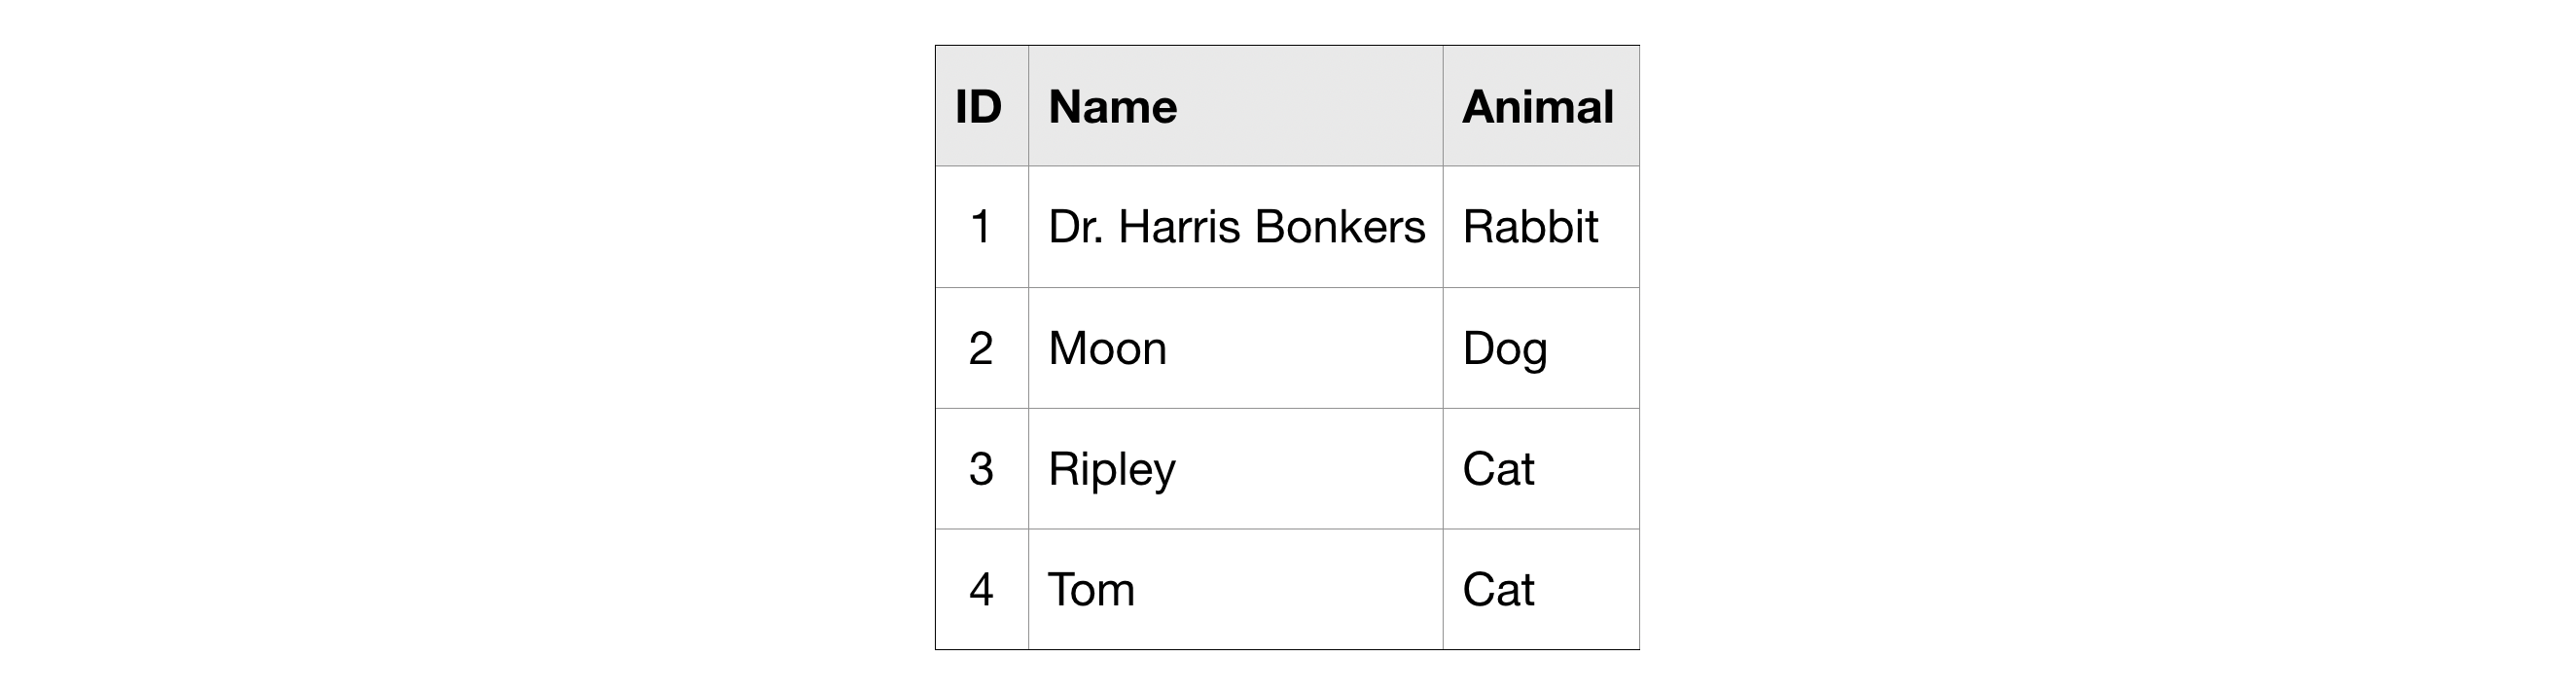

<h2>SELECT ... FROM</h2>

The most basic SQL query selects a single column from a single table. To do this,

* specify the column you want after the word **SELECT**, and then
* specify the table after the word **FROM**.

For instance, to select the `Name` column (from the `pets` table in the `pet_records` database in the `bigquery-public-data` project), our query would appear as follows:

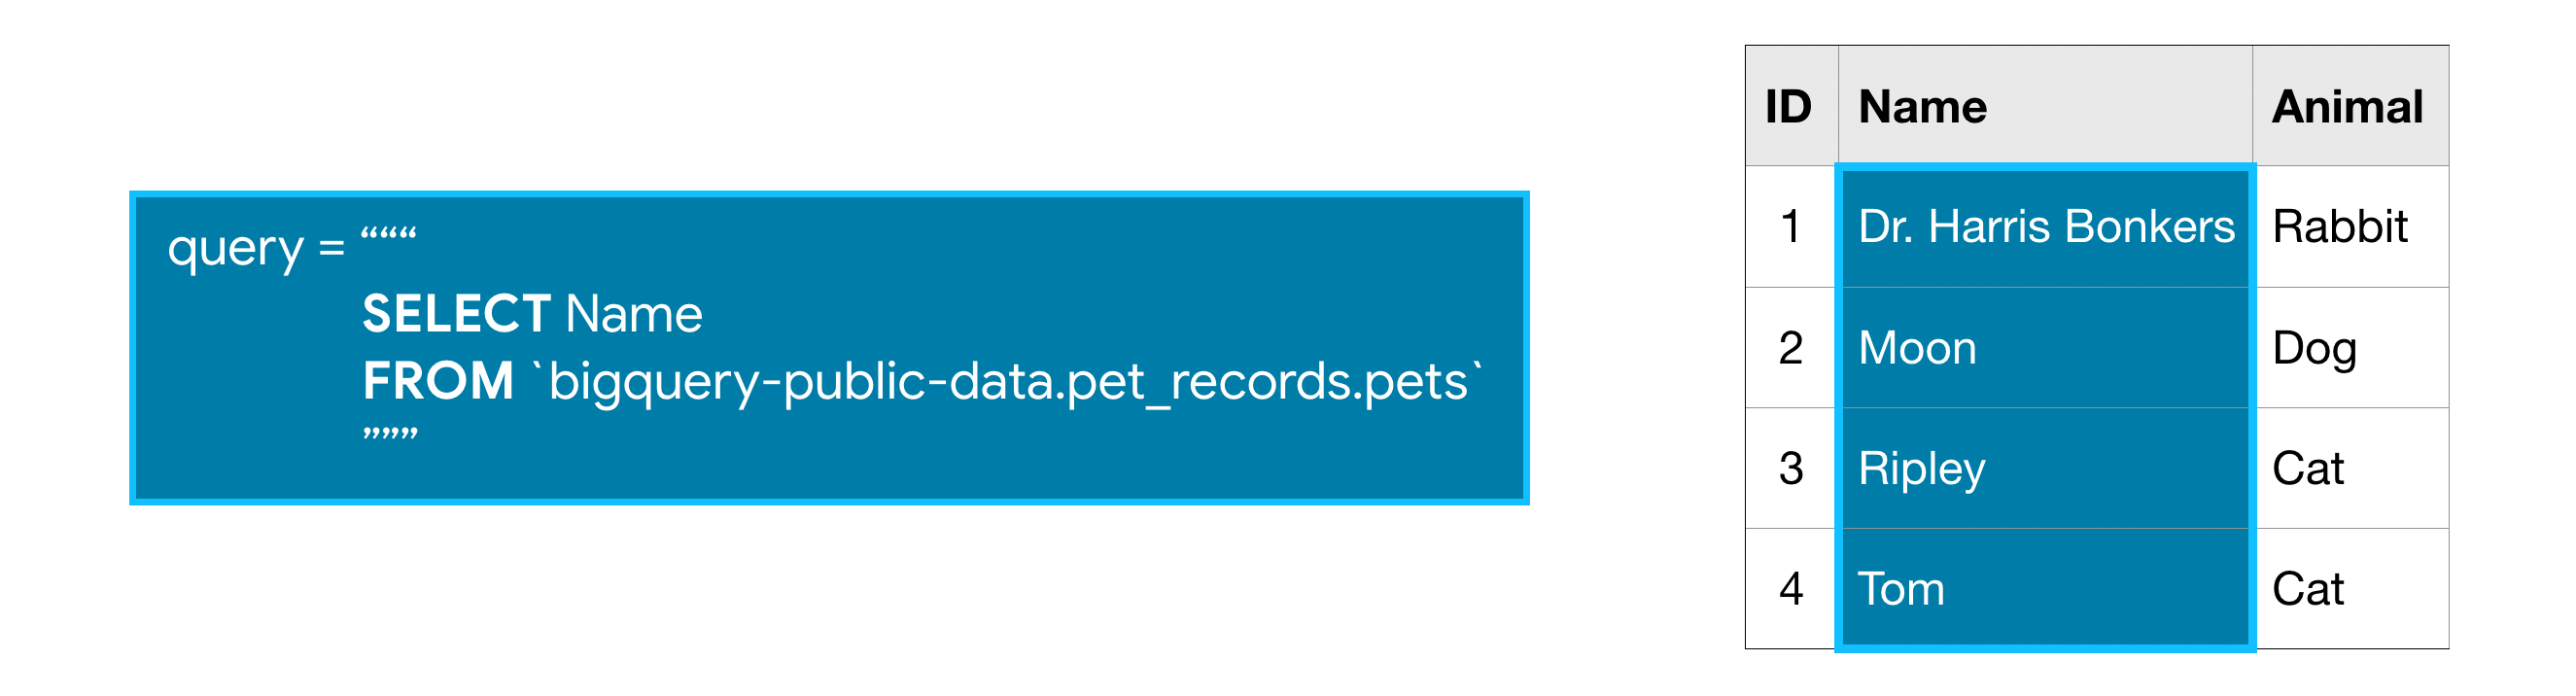

Note that when writing an SQL query, the argument we pass to **FROM** is not in single or double quotation marks (' or "). It is in backticks (`).

<h2>WHERE ...</h2>

BigQuery datasets are large, so you'll usually want to return only the rows meeting specific conditions. You can do this using the **WHERE** clause.

The query below returns the entries from the `Name` column that are in rows where the `Animal` column has the text `'Cat'`.



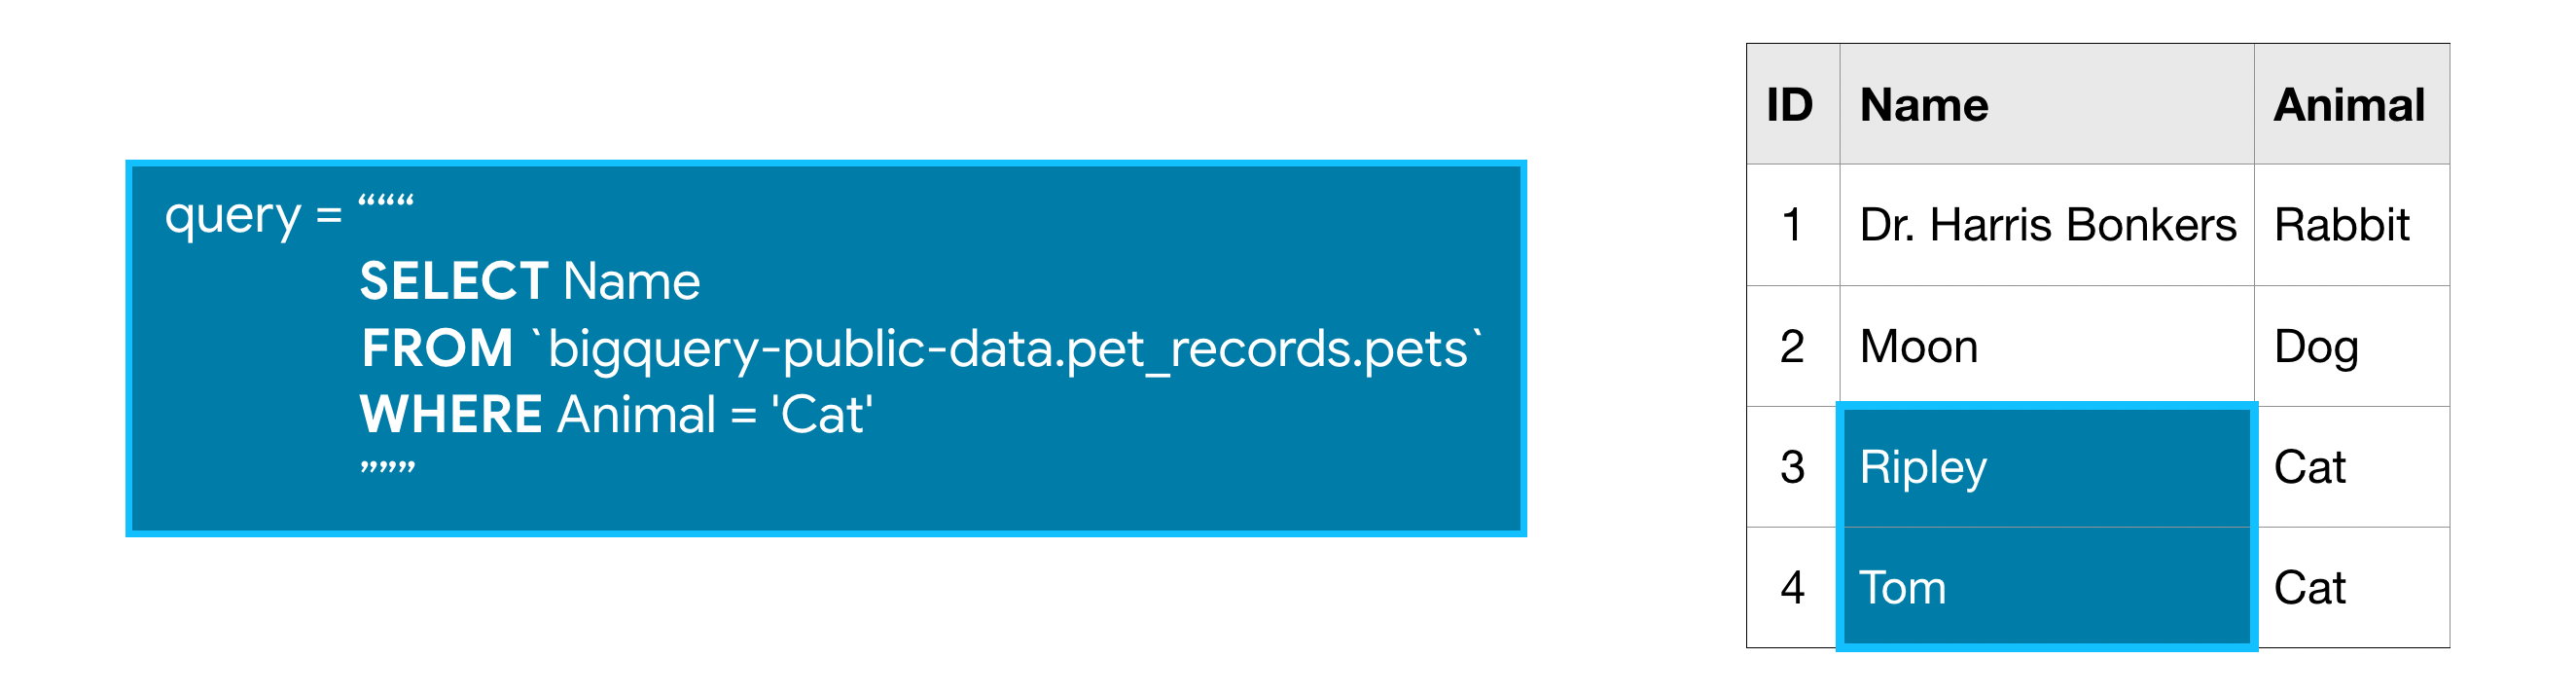

<h2>Example: What are all the U.S. cities in the OpenAQ dataset?</h2>

Now that you've got the basics down, let's work through an example with a real dataset. We'll use an [OpenAQ](https://openaq.org/) dataset about air quality.

First, we'll set up everything we need to run queries and take a quick peek at what tables are in our database.

In [ ]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Authenticate
from google.colab import auth
auth.authenticate_user()

# Construct a reference to the "openaq" dataset
dataset_ref = client.dataset("openaq", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# List all the tables in the "openaq" dataset
tables = list(client.list_tables(dataset))

# Print names of all tables in the dataset (there's only one!)
for table in tables:
    print(table.table_id)

global_air_quality


The dataset contains only one table, called `global_air_quality`. We'll fetch the table and take a peek at the first few rows to see what sort of data it contains.

In [ ]:
# Construct a reference to the "global_air_quality" table
table_ref = dataset_ref.table("global_air_quality")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "global_air_quality" table
client.list_rows(table, max_results=5).to_dataframe()

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom
0,"Borówiec, ul. Drapałka",Borówiec,PL,bc,0.85217,2022-04-28 07:00:00+00:00,µg/m³,GIOS,1.0,52.276794,17.074114,POINT(52.276794 1)
1,"Kraków, ul. Bulwarowa",Kraków,PL,bc,0.91284,2022-04-27 23:00:00+00:00,µg/m³,GIOS,1.0,50.069308,20.053492,POINT(50.069308 1)
2,"Płock, ul. Reja",Płock,PL,bc,1.41000,2022-03-30 04:00:00+00:00,µg/m³,GIOS,1.0,52.550938,19.709791,POINT(52.550938 1)
3,"Elbląg, ul. Bażyńskiego",Elbląg,PL,bc,0.33607,2022-05-03 13:00:00+00:00,µg/m³,GIOS,1.0,54.167847,19.410942,POINT(54.167847 1)
4,"Piastów, ul. Pułaskiego",Piastów,PL,bc,0.51000,2022-05-11 05:00:00+00:00,µg/m³,GIOS,1.0,52.191728,20.837489,POINT(52.191728 1)


Everything looks good! So, let's put together a query. Say we want to select all the values from the `city` column that are in rows where the `country` column is `'US'` (for "United States").

In [ ]:
# Query to select all the items from the "city" column where the "country" column is 'US'
query = """
        SELECT city
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US'
        """

<h2>Submitting the query to the dataset</h2>

We're ready to use this query to get information from the OpenAQ dataset. As in the previous tutorial, the first step is to create a [Client](https://google-cloud.readthedocs.io/en/latest/bigquery/generated/google.cloud.bigquery.client.Client.html#google.cloud.bigquery.client.Client) object.

In [ ]:
# Project ID
project_id = "burnished-road-363918"

In [ ]:
# Create a "Client" object
client = bigquery.Client(project=project_id)

We begin by setting up the query with the [`query()`](https://google-cloud.readthedocs.io/en/latest/bigquery/generated/google.cloud.bigquery.client.Client.query.html#google.cloud.bigquery.client.Client.query) method. We run the method with the default parameters, but this method also allows us to specify more complicated settings that you can read about in [the documentation](https://google-cloud.readthedocs.io/en/latest/bigquery/generated/google.cloud.bigquery.client.Client.query.html#google.cloud.bigquery.client.Client.query). We'll revisit this later.

In [ ]:
# Set up the query
query_job = client.query(query, project=project_id)

Next, we run the query and convert the results to a pandas DataFrame.

In [ ]:
# API request - run the query, and return a pandas DataFrame
us_cities = query_job.to_dataframe()

Now we've got a pandas DataFrame called `us_cities`, which we can use like any other DataFrame.

In [ ]:
# What five cities have the most measurements?
us_cities.city.value_counts().head()

,count
city,
Phoenix-Mesa-Scottsdale,39414
Los Angeles-Long Beach-Santa Ana,27479
Riverside-San Bernardino-Ontario,26887
New York-Northern New Jersey-Long Island,25417
San Francisco-Oakland-Fremont,22710


<h2>More queries</h2>

If you want multiple columns, you can select them with a comma between the names:

In [ ]:
query = """
        SELECT city, country
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US'
        """

You can select all columns with a * like this:

In [ ]:
query = """
        SELECT *
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US'
        """

<h2>Working with big datasets</h2>

BigQuery datasets can be huge. We allow you to do a lot of computation for free, but everyone has some limit.

**Each Kaggle user can scan 5TB every 30 days for free. Once you hit that limit, you'll have to wait for it to reset.**

The biggest dataset currently on Kaggle is 3TB, so you can go through your 30-day limit in a couple queries if you aren't careful.

Don't worry though: we'll teach you how to avoid scanning too much data at once, so that you don't run over your limit.

To begin,you can estimate the size of any query before running it. Here is an example using the (*very large!*) Hacker News dataset. To see how much data a query will scan, we create a `QueryJobConfig` object and set the `dry_run` parameter to `True`.

In [ ]:
# Query to get the score column from every row where the type column has value "job"
query = """
        SELECT score, title
        FROM `bigquery-public-data.hacker_news.full`
        WHERE type = "job"
        """

# Create a QueryJobConfig object to estimate size of query without running it
dry_run_config = bigquery.QueryJobConfig(dry_run=True)


# API request - dry run query to estimate costs
dry_run_query_job = client.query(query, job_config=dry_run_config)

In [ ]:
total_bytes = dry_run_query_job.total_bytes_processed
if total_bytes < 1E3:
  print("This query will process {} bytes.".format(total_bytes))
elif 1E3 < total_bytes < 1E6:
  print("This query will process {} kilobytes.".format(round(total_bytes/1E3, 2)))
elif 1E6 < total_bytes < 1E9:
  print("This query will process {} megabytes.".format(round(total_bytes/1E6, 2)))
elif 1E9 < total_bytes < 1E12:
  print("This query will process {} gigabytes.".format(round(total_bytes/1E9, 2)))
else:
  print("This query will process {} terabytes.".format(round(total_bytes/1E12, 2)))

This query will process 773.83 megabytes.


You can also specify a parameter when running the query to limit how much data you are willing to scan. Here's an example with a low limit.

In [ ]:
# Only run the query if it's less than 1 MB
ONE_MB = 1000*1000
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=ONE_MB)

# Set up the query (will only run if it's less than 1 MB)
safe_query_job = client.query(query, job_config=safe_config)

# API request - try to run the query, and return a pandas DataFrame
safe_query_job.to_dataframe()

InternalServerError: 500 Query exceeded limit for bytes billed: 1000000. 700448768 or higher required.; reason: bytesBilledLimitExceeded, message: Query exceeded limit for bytes billed: 1000000. 700448768 or higher required.

Location: US
Job ID: 33166c0d-ba80-41d7-8309-25d8c4016baf


In this case, the query was cancelled, because the limit of 1 MB was exceeded. However, we can increase the limit to run the query successfully!

In [ ]:
# Only run the query if it's less than 1 GB
ONE_GB = 1000*1000*1000
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=ONE_GB)

# Set up the query (will only run if it's less than 1 GB)
safe_query_job = client.query(query, job_config=safe_config)

# API request - try to run the query, and return a pandas DataFrame
job_post_scores = safe_query_job.to_dataframe()

# Print average score for job posts
job_post_scores.score.mean()

np.float64(1.650287998119196)